В данной работе предлагается решить задачу мультиклассовой классификации для датасета флагов различных стран  
(https://archive.ics.uci.edu/ml/datasets/Flags)

    Загрузить данные из папки Data Folder
    Провести описательный анализ предложенных данных
    Предложить стратегию по работе с категориальными переменными
    Провести углубленный анализ данных (корреляции переменных, визуализация взаимосвязей)
    Следует ли увеличивать/уменьшать размерность признакового множества (какой подход выдает лучшие результаты)
    Следует ли балансировать классы путем oversampling/undersampling? (улучшает ли подход результаты)
    Сделать кросс-валидацию данных с использованием подхода K-fold (n_folds=3)
    Решить задачу мультиклассовой классификации и предсказать религию страны (religion) по деталям ее флага
    Рассчитать Feature Importances для переменных модели
    Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall
    Построить Confusion Matrix для ваших результатов

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Загрузить данные из папки Data Folder

In [2]:
flag_data = open('data/flag.data', 'r')
# for i in range(10):
#     print(flag_data.readline())

In [3]:
flag_names = open('data/flag.names', 'r')
# for i in range(10):
#     print(flag_names.readline())
flag_names.readlines()

['1. TItle: Flag database\n',
 '\n',
 '2. Source Information\n',
 '   -- Creators: Collected primarily from the "Collins Gem Guide to Flags":\n',
 '      Collins Publishers (1986).\n',
 '   -- Donor: Richard S. Forsyth \n',
 '             8 Grosvenor Avenue\n',
 '             Mapperley Park\n',
 '             Nottingham NG3 5DX\n',
 '             0602-621676\n',
 '   -- Date: 5/15/1990\n',
 '\n',
 '3. Past Usage:\n',
 "   -- None known other than what is shown in Forsyth's PC/BEAGLE User's Guide.\n",
 '\n',
 '4. Relevant Information:\n',
 '   -- This data file contains details of various nations and their flags.\n',
 '      In this file the fields are separated by spaces (not commas).  With\n',
 '      this data you can try things like predicting the religion of a country\n',
 '      from its size and the colours in its flag.  \n',
 '   -- 10 attributes are numeric-valued.  The remainder are either Boolean-\n',
 '      or nominal-valued.\n',
 '\n',
 '5. Number of Instances: 194\n',
 '\

In [4]:
flag_index = open('data/Index', 'r')
# for i in range(10):
#     print(flag_index.readline())
# flag_index.readlines()

In [5]:
flag_list = [f.rstrip('\n') for f in flag_data]

In [6]:
df = pd.DataFrame(flag_list)

In [7]:
df = df[0].str.split(',',expand=True)

In [8]:
columns_list = ['name', 'landmass', 'zone', 'area', 'population', 'language', 'religion', 'bars', 'stripes', 'colours', 
                'red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'mainhue', 'circles', 'crosses', 'saltires', 
                    'quarters', 'sunstars', 'crescent', 'triangle', 'icon', 'animate', 'text', 'topleft', 'botright']

In [9]:
df.columns = columns_list

In [10]:
df.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


# Провести описательный анализ предложенных данных

In [11]:
df = df.apply(pd.to_numeric, errors='ignore')

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
landmass,194.0,3.572165,1.553018,1.0,3.0,4.0,5.00,6.0
zone,194.0,2.211340,1.308274,1.0,1.0,2.0,4.00,4.0
area,194.0,700.046392,2170.927932,0.0,9.0,111.0,471.25,22402.0
population,194.0,23.268041,91.934085,0.0,0.0,4.0,14.00,1008.0
language,194.0,5.340206,3.496517,1.0,2.0,6.0,9.00,10.0
religion,194.0,2.190722,2.061167,0.0,1.0,1.0,4.00,7.0
bars,194.0,0.453608,1.038339,0.0,0.0,0.0,0.00,5.0
stripes,194.0,1.551546,2.328005,0.0,0.0,0.0,3.00,14.0
colours,194.0,3.463918,1.300154,1.0,3.0,3.0,4.00,8.0
red,194.0,0.788660,0.409315,0.0,1.0,1.0,1.00,1.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        194 non-null    object
 1   landmass    194 non-null    int64 
 2   zone        194 non-null    int64 
 3   area        194 non-null    int64 
 4   population  194 non-null    int64 
 5   language    194 non-null    int64 
 6   religion    194 non-null    int64 
 7   bars        194 non-null    int64 
 8   stripes     194 non-null    int64 
 9   colours     194 non-null    int64 
 10  red         194 non-null    int64 
 11  green       194 non-null    int64 
 12  blue        194 non-null    int64 
 13  gold        194 non-null    int64 
 14  white       194 non-null    int64 
 15  black       194 non-null    int64 
 16  orange      194 non-null    int64 
 17  mainhue     194 non-null    object
 18  circles     194 non-null    int64 
 19  crosses     194 non-null    int64 
 20  saltires  

# Предложить стратегию по работе с категориальными переменными

In [14]:
df.name.value_counts()

Guatemala         1
St-Kitts-Nevis    1
North-Korea       1
Vanuatu           1
Luxembourg        1
                 ..
Burkina           1
Niue              1
Senegal           1
Gambia            1
Netherlands       1
Name: name, Length: 194, dtype: int64

In [15]:
# drop названий стран. Их слишком много, датасет маленький. 
df = df.drop('name', axis=1)

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()
le_2 = LabelEncoder()

In [18]:
df.botright.value_counts()

red       69
blue      47
green     40
white     17
black      9
gold       9
brown      2
orange     1
Name: botright, dtype: int64

In [19]:
df.topleft.value_counts()

red       56
blue      43
white     41
green     32
black     12
gold       6
orange     4
Name: topleft, dtype: int64

In [20]:
le.fit(df.botright)
le_2.fit(df.topleft)
df.botright = le.transform(df.botright)
df.topleft = le_2.transform(df.topleft)

In [21]:
df

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,5,1,648,16,10,2,0,3,5,1,...,0,0,1,0,0,1,0,0,0,4
1,3,1,29,3,6,6,0,0,3,1,...,0,0,1,0,0,0,1,0,5,6
2,4,1,2388,20,8,2,2,0,3,1,...,0,0,1,1,0,0,0,0,3,7
3,6,3,0,0,1,1,0,0,5,1,...,0,0,0,0,1,1,1,0,1,6
4,3,1,0,0,6,0,3,0,3,1,...,0,0,0,0,0,0,0,0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,6,3,3,0,1,1,0,0,3,1,...,0,1,5,0,0,0,0,0,1,6
190,3,1,256,22,6,6,0,3,4,1,...,0,0,1,0,0,0,0,0,1,6
191,4,2,905,28,10,5,0,0,4,1,...,0,0,0,0,0,1,1,0,3,4
192,4,2,753,6,10,5,3,0,4,1,...,0,0,0,0,0,0,1,0,3,2


In [22]:
# часть переменные в датасете де-факто категориальные, хотя уже после применения le
# возможно есть смысл глубже поработать с категориальными переменными и сделать ohe или get_dummies 
# для применения не только алгоритмов деревьев.

# Провести углубленный анализ данных (корреляции переменных, визуализация взаимосвязей)

In [23]:
import seaborn as sns

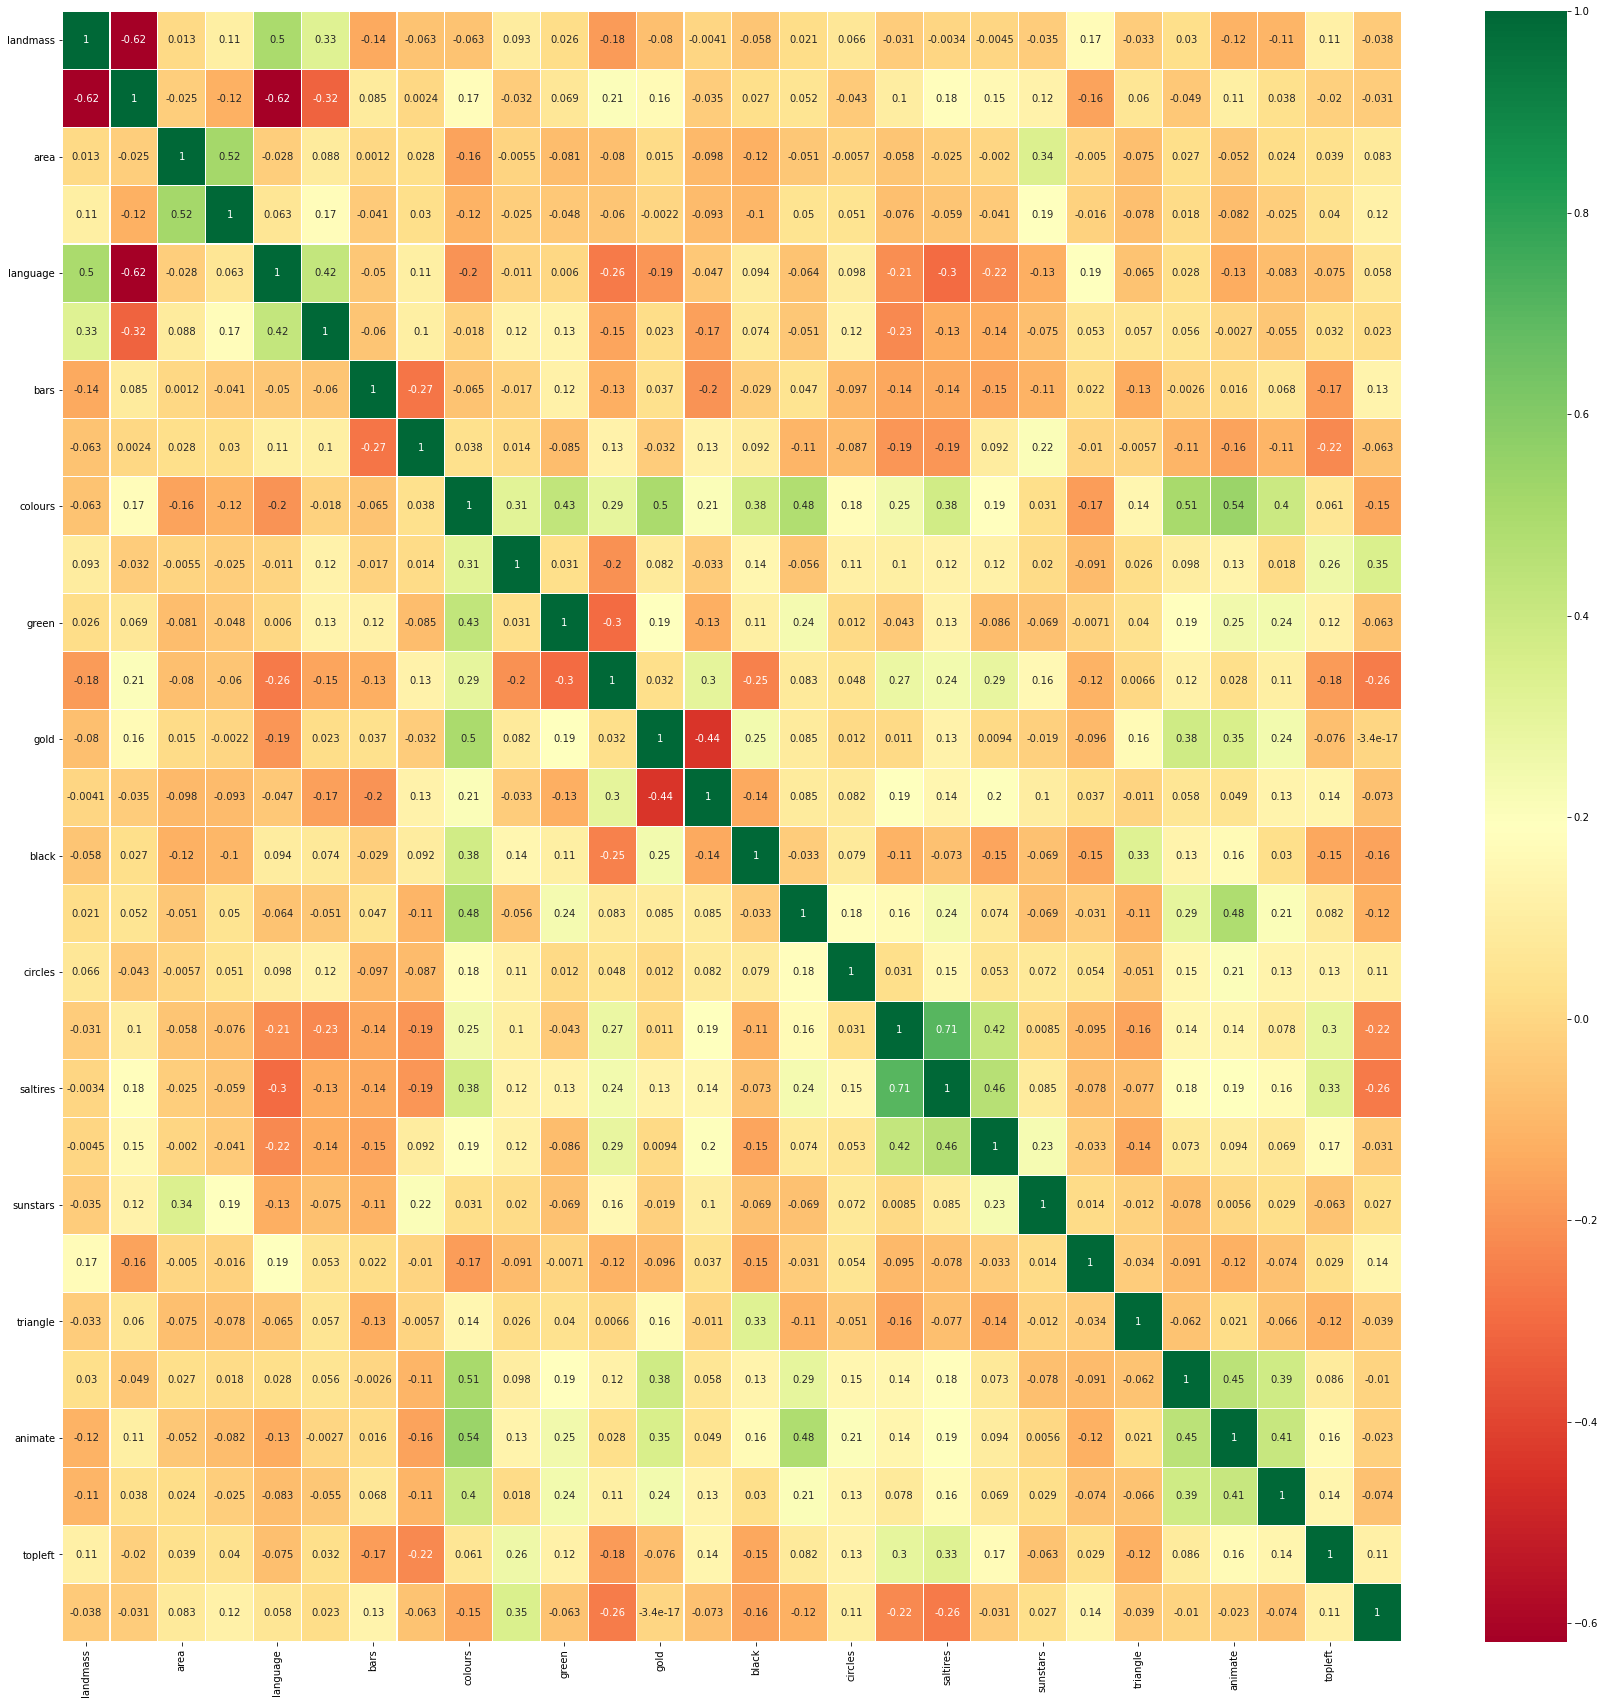

In [24]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(30,30)
plt.show()

In [25]:
from pandas_profiling import ProfileReport

In [35]:
# ProfileReport(df)

In [27]:
# высокая отрицательная корреляция между landmass & zone
# высока отрицательная корреляция между language & zone
# в остальном вроде более-менее

# предположим, что zone вполне нормально описывается комбинацией landmass+language и уберем его

In [28]:
df = df.drop('zone', axis=1)

# Следует ли увеличивать/уменьшать размерность признакового множества (какой подход выдает лучшие результаты)

In [29]:
X = df.drop('religion', axis=1)
X_short = df.loc[:, ['bars', 'stripes', 'colours', 
                'red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'circles', 'crosses', 'saltires', 
                        'quarters', 'sunstars', 'crescent', 'triangle', 'icon', 'animate', 'text', 'topleft', 'botright']]

y = df.religion

# Следует ли балансировать классы путем oversampling/undersampling? (улучшает ли подход результаты)

In [30]:
df.religion.value_counts()

1    60
0    40
2    36
5    27
6    15
3     8
7     4
4     4
Name: religion, dtype: int64

In [31]:
# классы разнородные

In [32]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [33]:
ros = RandomOverSampler(random_state=0)
X_resampled_ros, y_resampled_ros =  ros.fit_resample(X_short, y)

In [36]:
rus = RandomUnderSampler(random_state=0)
X_resampled_rus, y_resampled_rus =  rus.fit_resample(X_short, y)

# Сделать кросс-валидацию данных с использованием подхода K-fold (n_folds=3)

# Решить задачу мультиклассовой классификации и предсказать религию страны (religion) по деталям ее флага

In [37]:
from sklearn.model_selection import KFold

In [38]:
cv = KFold(n_splits=3, random_state=42, shuffle=True)

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
classifires = {}
i = 0

for train_index, test_index in cv.split(y_resampled_ros):
    clf = RandomForestClassifier(n_estimators=1000, max_depth=15)
    X_train, X_test = X_resampled_ros.iloc[train_index,:], X_resampled_ros.iloc[test_index, :]
    y_train, y_test = y_resampled_ros[train_index], y_resampled_ros[test_index]
    clf.fit(X_train, y_train)
    clf_score = clf.score(X_test, y_test) 
    i+=1
    
    classifires.setdefault(i,[clf_score,clf])

In [44]:
classifires

{1: [0.85, RandomForestClassifier(max_depth=15, n_estimators=1000)],
 2: [0.825, RandomForestClassifier(max_depth=15, n_estimators=1000)],
 3: [0.8375, RandomForestClassifier(max_depth=15, n_estimators=1000)]}

# Рассчитать Feature Importances для переменных модели

''

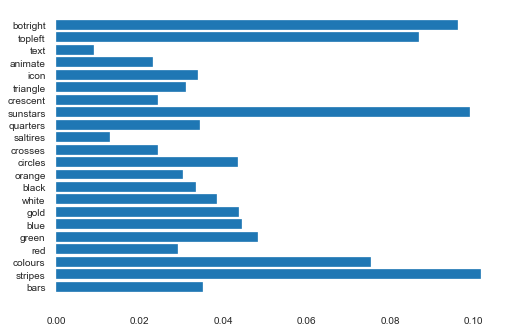

In [45]:
plt.barh(np.arange(len(clf.feature_importances_)),clf.feature_importances_)
plt.yticks(np.arange(len(X_short.columns)),X_short.columns)
''

# Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall

In [46]:
predictions = clf.predict(X_test)

In [47]:
from sklearn import metrics

In [48]:
metrics.accuracy_score(y_test, predictions)

0.8375

In [49]:
metrics.f1_score(y_test, predictions, average='weighted')

0.8376281908715744

In [50]:
metrics.precision_score(y_test, predictions, average='weighted')

0.8388115530303031

In [51]:
metrics.recall_score(y_test, predictions, average='weighted')

0.8375

# Построить Confusion Matrix для ваших результатов

In [52]:
metrics.confusion_matrix(y_test, predictions)

array([[13,  2,  2,  0,  0,  2,  1,  0],
       [ 4,  7,  1,  1,  0,  0,  0,  0],
       [ 0,  1, 17,  0,  0,  3,  0,  0],
       [ 0,  0,  0, 23,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 20,  0,  0,  0],
       [ 3,  3,  0,  0,  0, 15,  1,  0],
       [ 2,  0,  0,  0,  0,  0, 17,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 22]], dtype=int64)